In [1]:
import numpy as np
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [2]:
df = datasets.load_digits()

In [3]:
scaler = MinMaxScaler()

In [4]:
previsores = np.asarray(df.data, 'float32')
previsores = scaler.fit_transform(previsores)

In [5]:
classe = np.asarray(df.target)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [19]:
rbm = BernoulliRBM(random_state = 0)
rbm.n_iter = 100
rbm.n_components = 64
naive_rbm = GaussianNB()

In [20]:
model = Pipeline(steps = [('rbm', rbm), ('naive', naive_rbm)])
model.fit(x_train, y_train)

Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=64, n_iter=100, random_state=0)),
                ('naive', GaussianNB())])

In [21]:
pred = model.predict(x_test)

In [22]:
precisão = metrics.accuracy_score(pred, y_test)
precisão

0.8592592592592593

In [11]:
naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [12]:
pred2 = naive.predict(x_test)
pred2

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 3, 4, 3, 1, 0, 1, 1, 6, 7, 7,
       1, 0, 7, 6, 3, 1, 3, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 8, 8, 8, 3, 5, 1, 3, 1, 2, 1, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
       1, 8, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1, 5, 5, 8, 5, 8, 0, 7, 1, 7, 7,
       3, 7, 8, 9, 7, 7, 8, 1, 6, 5, 3, 5, 5, 4, 1, 7, 0, 6, 8, 5, 3, 1,
       1, 5, 9, 9, 5, 7, 5, 6, 8, 8, 6, 7, 6, 1, 5, 1, 7, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 3, 8, 6, 1, 0, 7, 1, 6,
       3, 3, 6, 7, 4, 3, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 7, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 1, 1, 4, 8, 1, 6, 1, 9,
       1, 4, 9, 3, 7, 6, 8, 3, 3, 1, 6, 9, 8, 6, 3, 1, 2, 0, 7, 6, 1, 1,
       8, 7, 3, 7, 1, 5, 5, 7, 5, 3, 8, 7, 2, 7, 5, 5, 7, 0, 3, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 1, 8, 8, 4, 6, 7, 5, 2, 1,
       7, 3, 8, 4, 6, 9, 4, 5, 7, 3, 4, 6, 2, 3, 0,

In [13]:
precisão2 = metrics.accuracy_score(pred2, y_test)
precisão2

0.7962962962962963

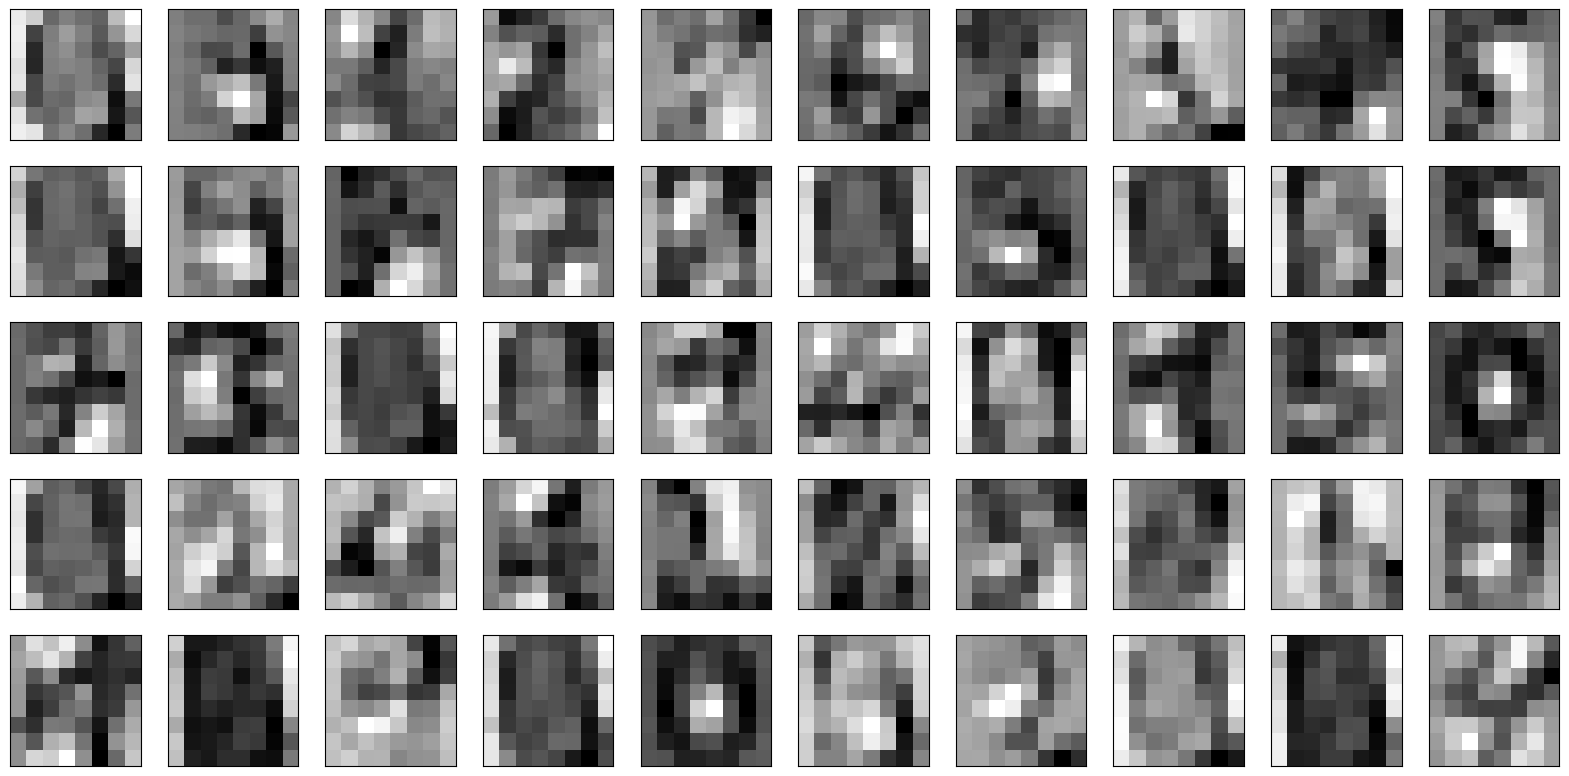

In [14]:
components = rbm.components_

plt.figure(figsize=(20, 20))
for i in range(50):
    plt.subplot(10, 10, i + 1)
    plt.imshow(components[i].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())

plt.show()